In [4]:
import sys, os
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/UClim4HSE/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/UClim4HSE


In [3]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

#### Загружаем датасет и добавляем в него скорость ветра

In [6]:
ds = xr.load_dataset (r'ERA5_demo_data/Moscow 2022.nc')


ds['vel10'] = np.sqrt (ds['u10']**2 + ds['v10']**2)
display(ds)

<xarray.Dataset> Size: 635MB
Dimensions:    (longitude: 41, latitude: 17, time: 8760)
Coordinates:
  * longitude  (longitude) float32 164B 30.0 30.25 30.5 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 68B 58.0 57.75 57.5 57.25 ... 54.5 54.25 54.0
  * time       (time) datetime64[ns] 70kB 2022-01-01 ... 2022-12-31T23:00:00
Data variables: (12/13)
    u10        (time, latitude, longitude) float64 49MB 2.176 2.217 ... 2.246
    v10        (time, latitude, longitude) float64 49MB -0.1972 ... 2.976
    d2m        (time, latitude, longitude) float64 49MB 272.1 272.1 ... 273.2
    t2m        (time, latitude, longitude) float64 49MB 273.0 273.0 ... 273.8
    blh        (time, latitude, longitude) float64 49MB 432.9 442.9 ... 414.1
    msl        (time, latitude, longitude) float64 49MB 1.001e+05 ... 1.018e+05
    ...         ...
    sp         (time, latitude, longitude) float64 49MB 9.94e+04 ... 1.002e+05
    ssrd       (time, latitude, longitude) float64 49MB 0.0 0.0 0.0 ... 0.0 0.0
    strd       (time, latitude, longitude) float64 49MB 1.086e+06 ... 1.059e+06
    tp         (time, latitude, longitude) float64 49MB 7.147e-06 ... 2.924e-06
    fdir       (time, latitude, longitude) float64 49MB 2.328e-10 ... 2.328e-10
    vel10      (time, latitude, longitude) float64 49MB 2.185 2.23 ... 3.728
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-26 19:24:07 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


#### Выбираем данные за июнь и осредняем их по времени


In [7]:
ds_cr = ds.where(ds['time'].dt.month == 6)
ds_mean = ds_cr.mean(dim = 'time')

#### Рисуем пространственное распределение осредненных значений

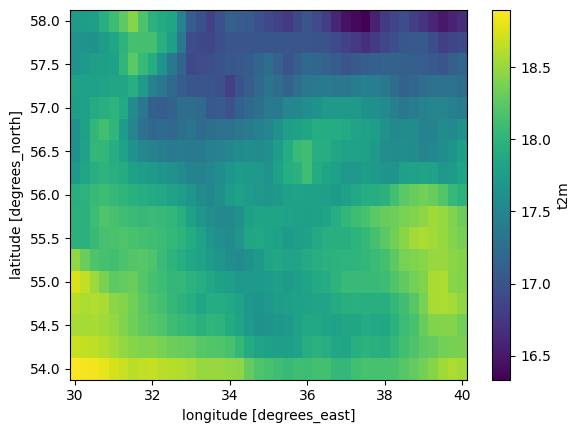

In [9]:
(ds_mean['t2m']-273.15).plot()



#### Выбираем данные для ячейки, ближайшей к заданным координатам, и строим график

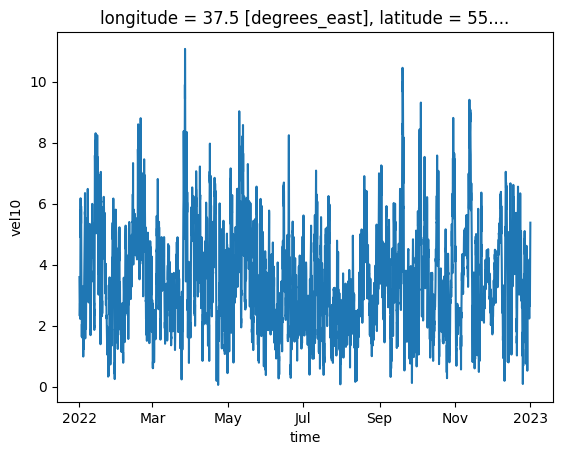

In [33]:
ds4point = ds.sel (longitude = 37.5, latitude = 55.6, method = 'nearest')
ds4point['vel10'].plot()
ds4point['t2m'] = ds4point['t2m'] - 273.15

#### Конвертируем данные для точки в pandas DataFrame, чтобы можно было работать с ними так же, как с данными наблюдений ранее

In [34]:
df4point = ds4point.to_dataframe()
display(df4point.head())

,longitude,latitude,u10,v10,d2m,t2m,blh,msl,ptype,sp,ssrd,strd,tp,fdir,vel10
time,,,,,,,,,,,,,,,
2022-01-01 00:00:00,37.5,55.5,2.718058,2.350349,270.878688,-1.793738,365.950768,100140.833131,4.999985,97967.048887,0.0,1.094956e+06,0.000186,2.328306e-10,3.593325
2022-01-01 01:00:00,37.5,55.5,2.638202,2.037460,271.008347,-1.737948,334.958108,100085.525023,4.999985,97914.182417,0.0,1.099229e+06,0.000145,2.328306e-10,3.333369
2022-01-01 02:00:00,37.5,55.5,2.728176,1.318424,271.444404,-1.451561,317.329733,100037.764845,4.999985,97868.763985,0.0,1.105446e+06,0.000109,2.328306e-10,3.030047
2022-01-01 03:00:00,37.5,55.5,2.637479,0.724457,271.481450,-1.406929,286.701081,100030.477188,4.999985,97863.214466,0.0,1.101188e+06,0.000087,2.328306e-10,2.735166
2022-01-01 04:00:00,37.5,55.5,2.495111,0.292164,271.537790,-1.343700,255.292412,100016.552558,4.999985,97849.340669,0.0,1.098353e+06,0.000062,2.328306e-10,2.512158


In [39]:
#Загрузим данные наблюдений в центре Москвы
sys.path.append('/content/drive/MyDrive/UClim4HSE/UClim4HSE-2025/scripts/')
import meteo_utils

df_urb = meteo_utils.read_weaclim_dir ('weaclim_data/27605')
df_rur = meteo_utils.read_weaclim_dir ('weaclim_data/27518')

In [40]:
rename = lambda df, word: df.rename(columns = {x:word + x for x in df.columns})

df = rename (df_urb, 'urb_').merge (rename (df_rur, 'rur_'), left_index=True, right_index=True).merge (rename (df4point, 'ERA5_'), left_index=True, right_index=True)
display(df.head())

df = df.sort_index()


,urb_t2m,urb_rh2m,urb_slp,urb_ps,urb_vel10m,urb_gust10m,urb_tcc,urb_lcc,urb_dir10m,rur_t2m,...,ERA5_t2m,ERA5_blh,ERA5_msl,ERA5_ptype,ERA5_sp,ERA5_ssrd,ERA5_strd,ERA5_tp,ERA5_fdir,ERA5_vel10
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-04-01 12:00:00,5.2,49,1011.6,996.3,2.0,NaN,8.0,6.0,90.0,3.1,...,3.319402,1054.965436,101093.694231,0.000000,98935.147863,1.322501e+06,1.011802e+06,0.000000,2.407551e+05,5.293451
2022-04-01 15:00:00,3.8,47,1010.7,995.3,3.0,NaN,10.0,10.0,90.0,3.3,...,2.638766,976.079756,101011.447821,6.000031,98848.400119,3.093185e+05,1.041523e+06,0.000024,2.009020e+04,5.335216
2022-04-01 18:00:00,2.6,54,1010.7,995.3,3.0,NaN,10.0,0.0,90.0,2.2,...,1.193809,830.892666,100987.502664,6.000031,98812.328246,0.000000e+00,1.031270e+06,0.000101,2.328306e-10,5.578627
2022-04-01 21:00:00,1.7,64,1009.2,993.7,2.0,NaN,10.0,10.0,90.0,1.2,...,0.459242,722.886366,100884.694651,4.999985,98704.988866,0.000000e+00,1.029608e+06,0.000062,2.328306e-10,5.136211
2022-04-02 00:00:00,0.6,68,1007.8,992.4,2.0,NaN,10.0,10.0,45.0,0.2,...,-0.022410,683.677532,100687.667649,4.999985,98510.901743,0.000000e+00,9.645572e+05,0.000051,2.328306e-10,5.108360


In [41]:
import plotly.express as px

fig = px.line(df, y=['urb_t2m', 'rur_t2m', 'ERA5_t2m'], title='Simple Time Series Plot') #, labels={'Value': 'Cumulative Value'})
fig.data[0].line.color = 'red'
fig.data[1].line.color = 'blue'
fig.data[2].line.color = 'black'
fig.show()